In [2]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using Clapeyron

### MEA Model

In [3]:
model = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1])];
#=        
    userlocations=(;
        Mw = [16.02, 14.03, 31.03],
        epsilon = [284.78 348.39 528.21;
                   348.39 473.39 423.17;
                   528.21 423.17 407.22],
        sigma = [4.8801, 3.2477, 3.4054],
        lambda_a = [6.000, 6.000, 6.000],
        lambda_r = [10.254, 19.871, 22.699],
        vst = [1.0, 1.0, 2.0],
        S = [0.79675, 0.22932, 0.58538],
        n_e=[1, 0, 2],
        n_H=[2, 0, 1],
        epsilon_assoc = Dict((("NH2","e"),("NH2","H")) => 1070.80,
                             (("NH2","e"),("CH2OH","H")) => 2403.78,
                             (("CH2OH","e"),("CH2OH","H")) => 2097.90,
                             (("CH2OH","e"),("NH2","H")) => 629.88),
        bondvol = Dict((("NH2","e"),("NH2","H")) => 95.225e-30,
                             (("NH2","e"),("CH2OH","H")) => 26.192e-30,
                             (("CH2OH","e"),("CH2OH","H")) => 62.309e-30,
                             (("CH2OH","e"),("NH2","H")) => 346.08e-30)
=#
    )#);

SAFTgammaMie{BasicIdeal} with 1 component:
 "MEA": "NH2" => 1, "CH2" => 1, "CH2OH" => 1
Group Type: SAFTgammaMie
Contains parameters: segment, shapefactor, lambda_a, lambda_r, sigma, epsilon, epsilon_assoc, bondvol

In [ ]:
Tc = crit_pure(model)[1] 
pc = crit_pure(model)[2]
vc = crit_pure(model)[3]
rho_c = 1/vc;

Tc_exp = 670
pc_exp = 80.3; # bar

In [23]:
N = 120
T = LinRange(Tc-500, Tc, N)
p = zeros(N)
vl = zeros(N)
vv = zeros(N)
rho_l = zeros(N)
rho_v = zeros(N);

In [24]:
for i in 1:N
    sat = saturation_pressure(model, T[i])
    p[i] = sat[1]
    vl[i] = sat[2]
    vv[i] = sat[3]
    rho_l[i] = 1.0/sat[2]
    rho_v[i] = 1.0/sat[3]
end

In [60]:
v_p = CSV.read("MEA_Vapour_Pressure_Experimental.csv",
               header=[1, 2, 3],
               DataFrame);
rho = CSV.read("MEA_Density_Experimental_2.csv",
               header=[1, 2, 3],
               DataFrame);
rho_2 = CSV.read("MEA_Density_Experimental_3.csv",
               header=[1, 2, 3],
               DataFrame);
rho_3 = CSV.read("MEA_Density_NistLiq.csv",
               header=[1, 2, 3],
               DataFrame);
rho_4 = CSV.read("MEA_Density_NistVap.csv",
               header=[1, 2, 3],
               DataFrame);
uncert_1 = CSV.read("MEA_Density_NistLiq_Uncert.csv",
               header=[1, 2, 3],
               DataFrame);
uncert_2 = CSV.read("MEA_Density_NistVap_Uncert.csv",
               header=[1, 2, 3],
               DataFrame);

In [64]:
T_vp_exp = v_p[:, 1]
p_exp = v_p[:, 2]

T_rho_exp = rho[:, 1]
rho_exp = rho[:, 2];
T_rho_exp_2 = rho_2[:, 1]
rho_exp_2 = rho_2[:, 2];
T_rho_exp_3 = rho_3[:, 1]
rho_exp_3 = rho_3[:, 2];
T_rho_exp_4 = rho_4[:, 1]
rho_exp_4 = rho_4[:, 2];
uncert_exp_1 = uncert_1[:, 2]
uncert_exp_2 = uncert_2[:, 2]

16-element Vector{Float64}:
  1.2
  1.2
  1.3
  1.6
  2.1
  2.7
  3.4
  4.2
  5.0
  6.0
  7.1
  8.3
  9.9
 12.0
 17.0
 21.0

In [ ]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12),
           xtickfont = font(12),
           ytickfont = font(12),
           xlims = (350, Tc + 10))

plot!(plt, T, p./1e5, 
      color = "black", 
      line = (:path, 3), 
      label = "SAFT-γ Mie")

plot!(plt, [Tc], [pc]./1e5, 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "black",
      marker = :square,
      line = (:scatter, 0.5), 
      label = "SAFT-γ Mie Critical Point")

plot!(plt, T_vp_exp, p_exp./1e5, 
      seriestype = :scatter, 
      color = "white", 
      markerstrokecolor = "black", 
      line = (:scatter, 0.4), 
      label = "Experimental Data")

plot!(plt, 670, 80.3, 
      seriestype = :scatter, 
      color = "white", 
      markerstrokecolor = "black", 
      marker = :square,
      line = (:scatter, 0.4), 
      label = "Experimental Critical Point")

xlabel!(plt, "Temperature / (K)", xguidefontsize = 12)
ylabel!(plt, "Pressure / (bar)", yguidefontsize = 12)

In [74]:
Mw = sum([16.02, 14.03, 31.03])/1000;

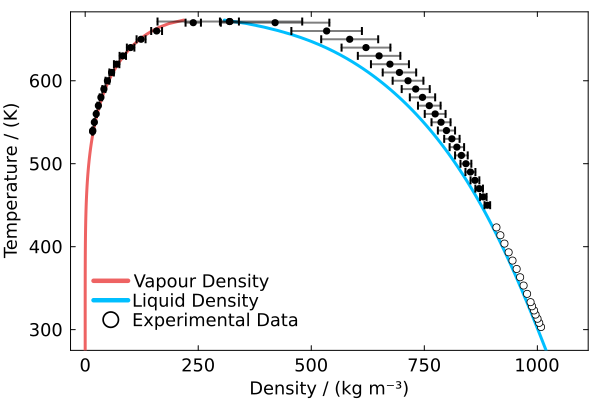

In [73]:
colours = ["indianred2", "deepskyblue1"]

plt2 = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12),
           legend = :bottomleft,
           xtickfont = font(12),
           ytickfont = font(12),
           ylims = (275, Tc + 10))

plot!(plt2, rho_v.*Mw, T, 
      color = colours[1], 
      line = (:path, 3), 
      label = "Vapour Density")

plot!(plt2, rho_l.*Mw, T,
      color = colours[2],
      line = (:path, 3),
      label = "Liquid Density")

#=
plot!(plt2, [rho_c].*Mw, [Tc],
      seriestype=:scatter, 
      color="black", 
      markerstrokecolor="black", 
      marker = :square,
      line = (:scatter, 0.5),
      label = "SAFT-γ Mie Critical Point")
=#

plot!(plt2, rho_exp, T_rho_exp,
      seriestype=:scatter,
      color="white",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = "Experimental Data")

plot!(plt2, rho_exp_2, T_rho_exp_2,
      seriestype=:scatter,
      color="white",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = nothing)

plot!(plt2, rho_exp_3, T_rho_exp_3,
      seriestype=:scatter,
      color="black",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = nothing,
      xerr = uncert_exp_1,
      linewidth = 2
)

plot!(plt2, rho_exp_4, T_rho_exp_4,
      seriestype=:scatter,
      color="black",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = nothing,
      xerr = uncert_exp_2,
      linewidth = 2)

xlabel!(plt2, "Density / (kg m⁻³)", yguidefontsize=12)
ylabel!(plt2, "Temperature / (K)", xguidefontsize=12)